In [ ]:
# use Python 3.10.12

import re
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
texts_file_name = './data/texts.txt'

def get_text(file_name):
    with open(file_name, 'r') as file:
        return file.readlines()

source_text = get_text(texts_file_name)
print(f'Loaded {texts_file_name} - length: {len(source_text)} lines, {len("".join(source_text))} characters')
    
# Loaded ./texts.txt - length: 672 lines, 63003 characters


Loaded ./texts.txt - length: 672 lines, 63003 characters


In [ ]:

def clean_text(text):
    cleaned_text = [re.sub(r'[^a-zA-Z]+', ' ', t).lower() for t in text]
    cleaned_text = ' '.join(cleaned_text)
    return cleaned_text

text = clean_text(source_text)

print(f'Text without punctuation and digits: {len(text)}')
print(f'\t{text[:100]}\n\t...\n\t{text[-100:]}')

space_count = text.count(' ')
print(f'Count of spaces: {space_count}, count of chars: {len(text) - space_count}')

# Text without punctuation and digits: 60385
# 	mi xidu na eskri yon ordinari lexi ji jandan jumle denpul eskri sen maxmo asan na doxo ji folki bant
# 	...
# 	m multi risi ji xosu patato bete xa yam xosu risi ji multi patato patre xa yam multi risi ji patato 
# Count of spaces: 12698, count of chars: 47687

Text without punctuation and digits: 60385
	mi xidu na eskri yon ordinari lexi ji jandan jumle denpul eskri sen maxmo asan na doxo ji folki bant
	...
	m multi risi ji xosu patato bete xa yam xosu risi ji multi patato patre xa yam multi risi ji patato 
Count of spaces: 12698, count of chars: 47687


In [ ]:
def get_words(text):
    return text.split()

all_words = get_words(text)
print(f'Total words count = {len(all_words)}')
print('First 10 words:', all_words[:10])
print('Last 10 words:', all_words[-10:])


# Total words count = 11813
# First 10 words: ['mi', 'xidu', 'na', 'eskri', 'yon', 'ordinari', 'lexi', 'ji', 'jandan', 'jumle']
# Last 10 words: ['ji', 'multi', 'patato', 'patre', 'xa', 'yam', 'multi', 'risi', 'ji', 'patato']

Total words count = 11813
First 10 words: ['mi', 'xidu', 'na', 'eskri', 'yon', 'ordinari', 'lexi', 'ji', 'jandan', 'jumle']
Last 10 words: ['ji', 'multi', 'patato', 'patre', 'xa', 'yam', 'multi', 'risi', 'ji', 'patato']


In [ ]:
def get_words_frequency(words):
    frequency = {}
    for word in words:
        if word in frequency:
            frequency[word] += 1
        else:
            frequency[word] = 1
    return frequency

words_frequency = get_words_frequency(all_words)
print(f'Count of unique words = {len(words_frequency)}')

# Count of unique words = 1672

Count of unique words = 1672


In [ ]:
def print_words_stats(words_frequency):
    sorted_words = sorted(words_frequency.items(), key=lambda item: item[1], reverse=True)
    top_20_words = sorted_words[:20]
    print('Top 20 frequent words:', top_20_words)
    
    vowel_ending_words = {word: count for word, count in words_frequency.items() if word[-1] in 'aeiou'}
    unique_vowel_ending_words_count = len(vowel_ending_words)
    total_vowel_ending_words_count = sum(vowel_ending_words.values())

    print(f'Count of unique words ending with a vowel: {unique_vowel_ending_words_count}')
    print(f'Total count of words ending with a vowel: {total_vowel_ending_words_count}')

    consonant_ending_words = {word: count for word, count in words_frequency.items() if word[-1] not in 'aeiou'}
    unique_consonant_ending_words_count = len(consonant_ending_words)
    total_consonant_ending_words_count = sum(consonant_ending_words.values())

    print(f'Count of unique words ending with a consonant: {unique_consonant_ending_words_count}')
    print(f'Total count of words ending with a consonant: {total_consonant_ending_words_count}')
    
print_words_stats(words_frequency)

# Top 20 frequent words: [('na', 369), ('ji', 356), ('le', 350), ('sen', 331), ('mi', 305), ('fe', 284), ('te', 268), ('hu', 185), ('no', 181), ('to', 161), ('de', 122), ('ki', 118), ('in', 117), ('ete', 114), ('am', 114), ('da', 113), ('yu', 113), ('cel', 111), ('mas', 93), ('tas', 87)]
# Count of unique words ending with a vowel: 1155
# Total count of words ending with a vowel: 8357
# Count of unique words ending with a consonant: 517
# Total count of words ending with a consonant: 3456


Top 20 frequent words: [('na', 369), ('ji', 356), ('le', 350), ('sen', 331), ('mi', 305), ('fe', 284), ('te', 268), ('hu', 185), ('no', 181), ('to', 161), ('de', 122), ('ki', 118), ('in', 117), ('ete', 114), ('am', 114), ('da', 113), ('yu', 113), ('cel', 111), ('mas', 93), ('tas', 87)]
Count of unique words ending with a vowel: 1155
Total count of words ending with a vowel: 8357
Count of unique words ending with a consonant: 517
Total count of words ending with a consonant: 3456


In [ ]:
def get_chars_frequency(words):
    frequency = {}
    for word in words:
        for char in word:
            case_insensitive_char = char.lower()
            if case_insensitive_char in frequency:
                frequency[case_insensitive_char] += 1
            else:
                frequency[case_insensitive_char] = 1
    return frequency

chars_frequency = get_chars_frequency(all_words)

def print_char_frequencies(chars_frequency):
    total_chars = sum(chars_frequency.values())
    print(f'Total characters count = {total_chars}')

    for char, count in sorted(chars_frequency.items(), key=lambda item: item[1], reverse=True):
        percentage = (count / total_chars) * 100
        print(f'{char}: {count}: {percentage:.2f}')
        
print_char_frequencies(chars_frequency)

# Total characters count = 47687
# a: 5934: 12.44
# e: 4761: 9.98
# i: 4155: 8.71
# o: 3731: 7.82
# n: 3420: 7.17
# u: 2857: 5.99
# l: 2616: 5.49
# m: 2397: 5.03
# s: 2286: 4.79
# t: 2169: 4.55
# r: 1936: 4.06
# k: 1537: 3.22
# d: 1374: 2.88
# y: 1334: 2.80
# b: 1016: 2.13
# h: 989: 2.07
# f: 949: 1.99
# j: 810: 1.70
# p: 804: 1.69
# x: 754: 1.58
# g: 708: 1.48
# w: 514: 1.08
# c: 398: 0.83
# v: 159: 0.33
# z: 79: 0.17



Total characters count = 47687
a: 5934: 12.44
e: 4761: 9.98
i: 4155: 8.71
o: 3731: 7.82
n: 3420: 7.17
u: 2857: 5.99
l: 2616: 5.49
m: 2397: 5.03
s: 2286: 4.79
t: 2169: 4.55
r: 1936: 4.06
k: 1537: 3.22
d: 1374: 2.88
y: 1334: 2.80
b: 1016: 2.13
h: 989: 2.07
f: 949: 1.99
j: 810: 1.70
p: 804: 1.69
x: 754: 1.58
g: 708: 1.48
w: 514: 1.08
c: 398: 0.83
v: 159: 0.33
z: 79: 0.17


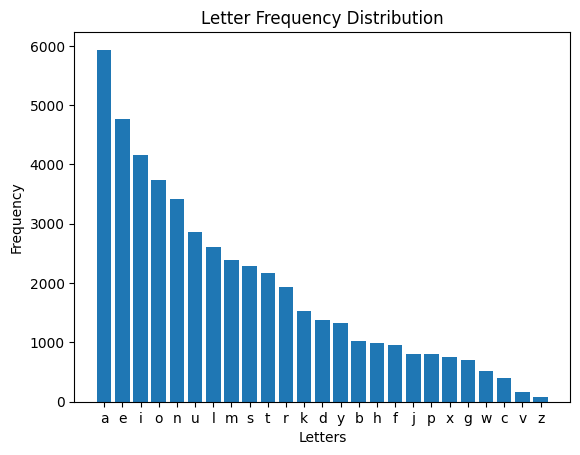

In [9]:
# pip install matplotlib



sorted_chars_frequency = sorted(chars_frequency.items(), key=lambda item: item[1], reverse=True)
letters = [item[0] for item in sorted_chars_frequency]
frequencies = [item[1] for item in sorted_chars_frequency]

# letters = list(chars_frequency.keys())
# frequencies = list(chars_frequency.values())

plt.bar(letters, frequencies)
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Letter Frequency Distribution')
plt.show()